# Interpretability 4: Feature attribution

How to determine the importance of features? This is known as feature attribution. This notebook shows how to get feature scores in KANs.

In [1]:
from kan import *
from sympy import *

# let's construct a dataset
f = lambda x: x[:,0]**2 + 0.3*x[:,1] + 0.1*x[:,2]**3 + 0.0*x[:,3]
dataset = create_dataset(f, n_var=4)

input_vars = [r'$x_'+str(i)+'$' for i in range(4)]

model = KAN(width=[4,5,1])
model.fit(dataset, steps=40, lamb=0.001);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.30e-03 | test_loss: 6.26e-03 | reg: 4.54e+00 | : 100%|█| 40/40 [00:21<00:00,  1.82it

saving model version 0.1


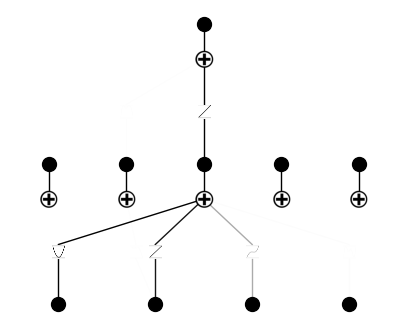

In [2]:
model.plot()

get feature score (for input variables)

In [3]:
model.feature_score

tensor([0.8906, 0.5176, 0.1139, 0.0041], grad_fn=<MeanBackward1>)

Inspect how hidden nodes depend on features

tensor([0.8900, 0.5142, 0.1136, 0.0038], grad_fn=<SelectBackward0>)

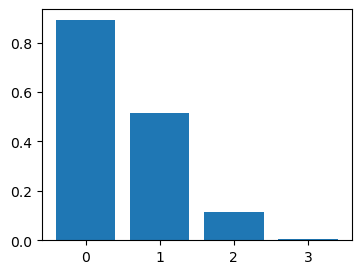

In [4]:
# the 2nd neuron (index start from 0) in the 1st layer
model.attribute(1,2)

tensor([1.9413e-05, 1.3491e-04, 5.7833e-05, 3.2742e-05],
       grad_fn=<SelectBackward0>)

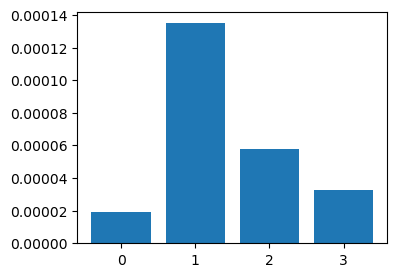

In [5]:
# the 3nd neuron (index start from 0) in the 1st layer
# note the y axis scale is really small
model.attribute(1,3)

In [ ]:
model.plot(in_vars=input_vars)

prune inputs

In [ ]:
model = model.prune_input()
model.plot(in_vars=input_vars)

Let's consider a high-dimensional case. In the case of many inputs but only few are important, the users may want to prune input otherwise too many inputs make interpretable hard.

In [ ]:
from kan import *

# let's construct a dataset
n_var = 100

def f(x):
    y = 0
    for i in range(n_var):
        # exponential decay
        y += x[:,[i]]**2*0.5**i
    return y
        
dataset = create_dataset(f, n_var=n_var)

input_vars = [r'$x_{'+str(i)+'}$' for i in range(n_var)]

model = KAN(width=[n_var,10,10,1], seed=2)
model.fit(dataset, steps=50, lamb=1e-3, reg_metric='edge_forward_n');

In [ ]:
model.plot()

In [ ]:
model = model.rewind('0.1')

In [ ]:
plt.scatter(np.arange(n_var)+1, model.feature_score.detach().numpy())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('rank of input features', fontsize=15)
plt.ylabel('feature attribution score', fontsize=15)

Since there are 100D inputs, it's very time consuming to plot the whole diagram and hard to read anything meaningful out of the diagram. So we want to prune the network first (including pruning hidden nodes and pruning inputs) and then plot it.

In [ ]:
model = model.prune()
model = model.prune_input(threshold=3e-2)
model.plot(in_vars=input_vars)

In [ ]:
model.fit(dataset, steps=50);

In [ ]:
model.plot(in_vars=input_vars)

In [ ]:
model.input_id

In [ ]:
input_vars

In [ ]:
model.input_id

In [ ]:
model.cache_data.shape

In [ ]:
# manual prune inputs
model = model.prune_input(active_inputs=[0,1,2,3,4])
model.plot(in_vars=input_vars)

In [ ]:
# prune nodes
model = model.prune_node()
model.plot(in_vars=input_vars)